# Introduction 

This is my notebook for the first take home challenge for Springboard. The questions I am responding to are in the pdf in this repository.

In [489]:
#importing some packages to start with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Part 1 - Exploratory Data Analysis
The first part of this project involves importing login data in the form of a time series and analyzing that data aggregated by 15 minute intervals. The following cells show my process of importing the data and turning it into a form I think I can work with to accomplish this task.

In [490]:
#import the data:
data = pd.read_json('logins.json')

In [491]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [492]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [493]:
data['login_time'] = pd.to_datetime(data.login_time)

In [494]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [495]:
# The first task is to aggredgate data by quarter hour intervals and analyze that data, so that will be the first thing I do
data['rounded'] = data.login_time.dt.round('15min')

In [496]:
counts = data.groupby('rounded').size()

In [497]:
count_df = pd.DataFrame(counts)

In [498]:
count_df

,0
rounded,
1970-01-01 20:15:00,6
1970-01-01 20:30:00,8
1970-01-01 20:45:00,7
1970-01-01 21:00:00,3
1970-01-01 21:15:00,4
1970-01-01 21:30:00,1
1970-01-01 21:45:00,1
1970-01-01 22:00:00,8
1970-01-01 22:15:00,9


# Interjection
Now that the login counts are aggregated by quarter hour intervals, I will take some time to view some summary statistics about the overall data befor making more granular observations.

In [499]:
count_df.describe()

,0
count,9376.000000
mean,9.934087
std,8.261908
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,67.000000


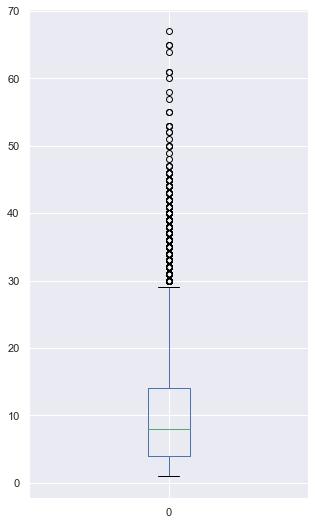

In [500]:
count_df.boxplot(figsize=(5, 9))

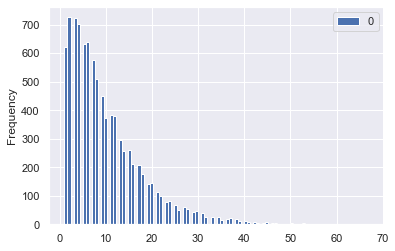

In [501]:
count_df.plot(kind='hist', bins = 100)

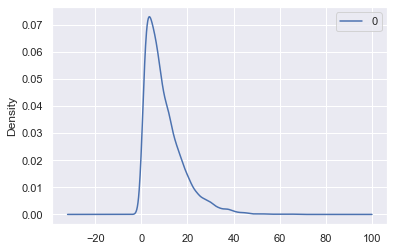

In [502]:
count_df.plot(kind='density')

The data in general seems to be exponentially distributed, with much of the data being under ten logins per quarter-hour, and really tapering off around 30. 

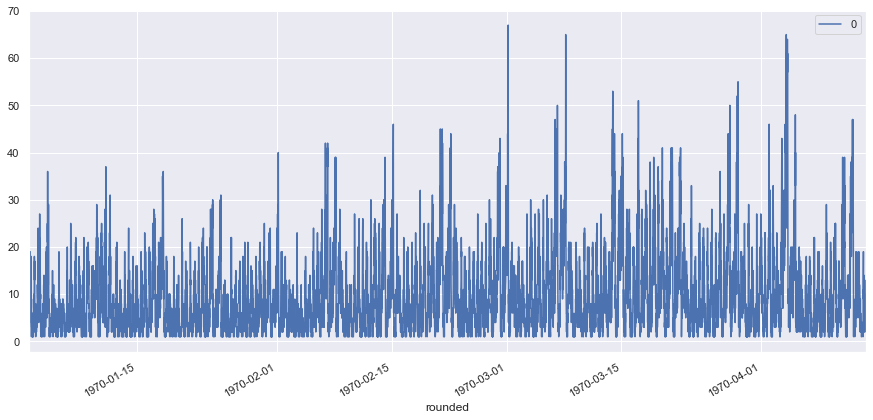

In [503]:
count_df.plot(figsize=(15, 7))

It seems we have cycles, which makes sense as the problem description wants me to look into those patterns in depth, but before we do that I would like to see a couple more summary statistic style plots, but in a more granular fashion.

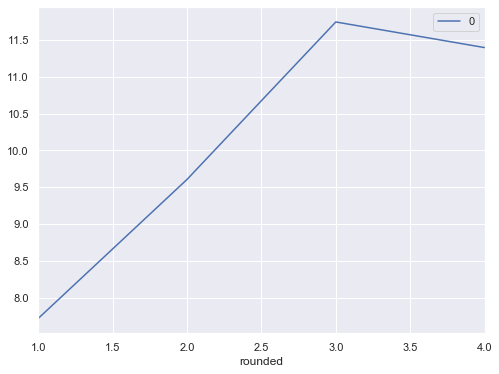

In [504]:
month = count_df.index.month
by_month = count_df.groupby(month).mean()
by_month.plot(figsize=(8, 6))

It seems our login count by month is increasing in general(especially since we don't have full april data), but not necesarily enough months in this particular dataset to make heads or tails of that observation at this point.

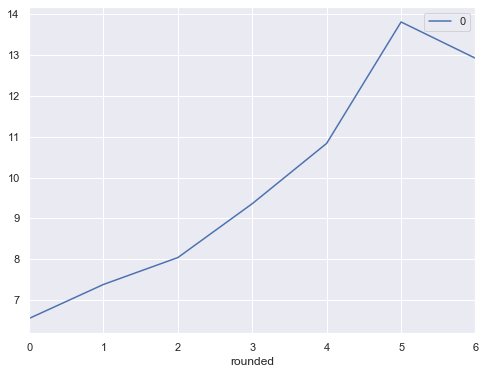

In [505]:
weekday = count_df.index.weekday
wkplt = count_df.groupby(weekday).mean()
wkplt.plot(figsize=(8, 6))

Observing these, we see Saturday and Sunday easily have the highest averages, with Friday not too far behind. In general, traffig increases throughout the week, peaking on Saturday.

Now I will look at some more granular depictions of the data, to help with trying to find patterns in weeks and for specific weekdays. I will first look at the first week of data, then a week in the 'middle' of the data, and a week at the end of the data, to see if patterns exist across time in the data, and try to observe patterns in days in the data.

In [506]:
count_df['counts'] = count_df[0]

In [507]:
count_df = count_df.drop(0, axis=1)

# Plotting first full week of data

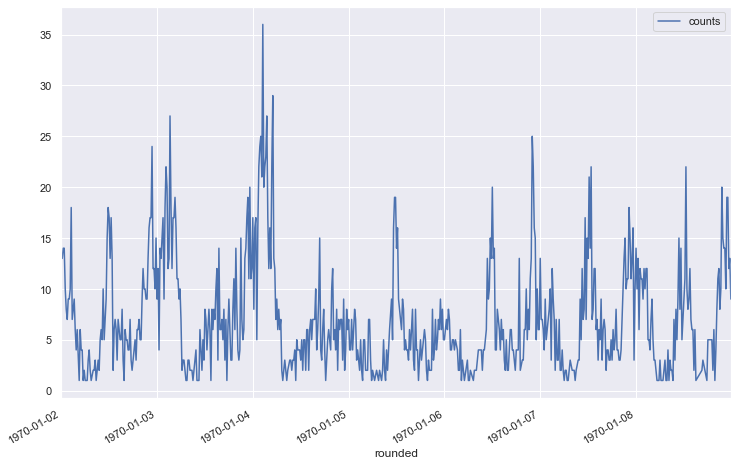

In [508]:
#plotting the first week of data, pandas days of week: 0 mon, 1 tues, 2 weds, 3 thurs, 4 fri, 5 sat, 6 sun
count_df['1970-01-02':'1970-01-08'].plot(figsize=(12, 8))

Text(0.5, 1.0, 'Friday')

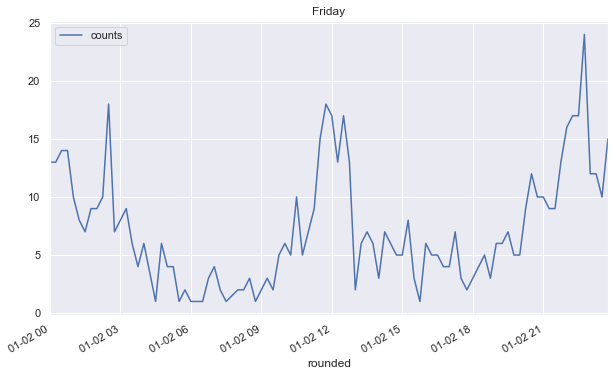

In [509]:
count_df['1970-01-02'].plot(figsize=(10, 6))
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

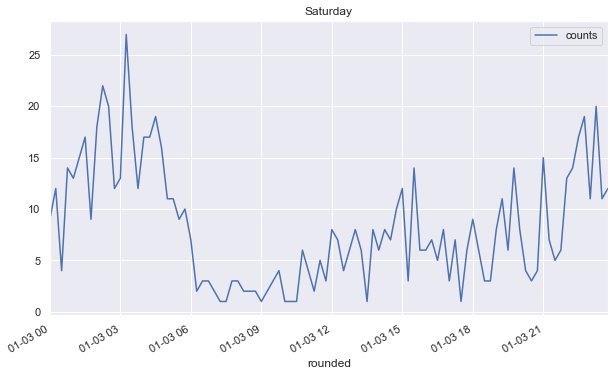

In [510]:
count_df['1970-01-03'].plot(figsize=(10, 6))
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

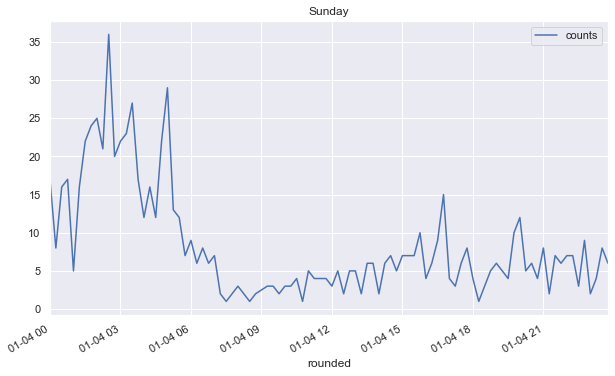

In [511]:
count_df['1970-01-04'].plot(figsize=(10, 6))
plt.title('Sunday')

Text(0.5, 1.0, 'Monday')

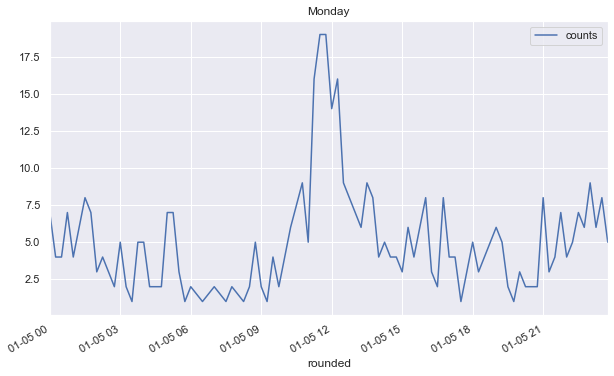

In [512]:
count_df['1970-01-05'].plot(figsize=(10, 6))
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

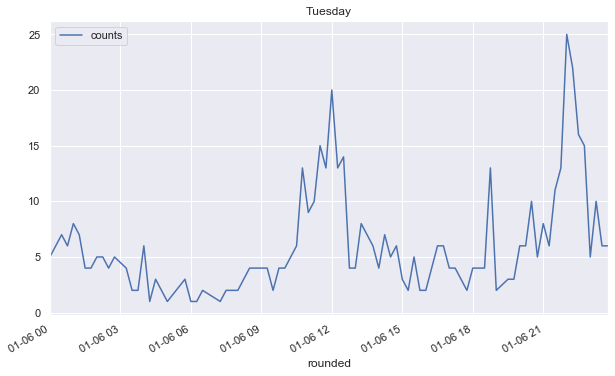

In [513]:
count_df['1970-01-06'].plot(figsize=(10, 6))
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

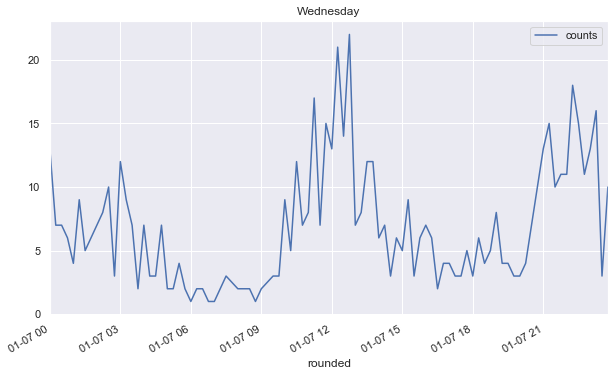

In [514]:
count_df['1970-01-07'].plot(figsize=(10, 6))
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

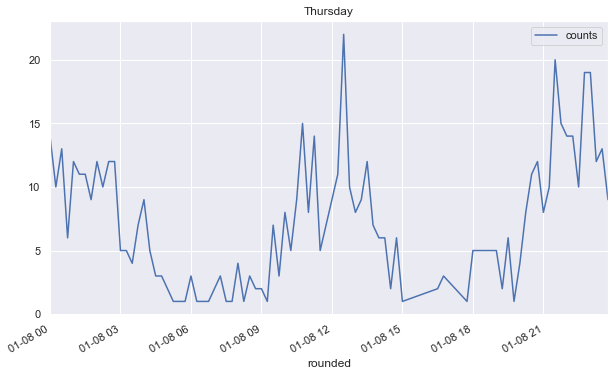

In [515]:
count_df['1970-01-08'].plot(figsize=(10, 6))
plt.title('Thursday')

# Plotting last week of February

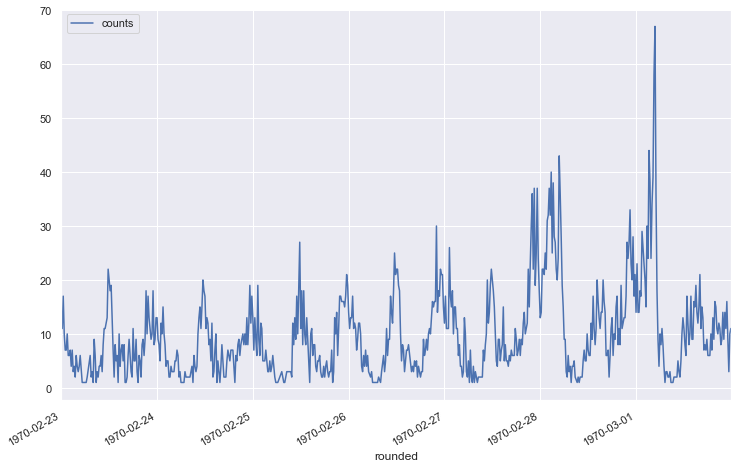

In [516]:
#plotting the first week of data, pandas days of week: 0 mon, 1 tues, 2 weds, 3 thurs, 4 fri, 5 sat, 6 sun
count_df['1970-02-23':'1970-03-01'].plot(figsize=(12, 8))

Text(0.5, 1.0, 'Monday')

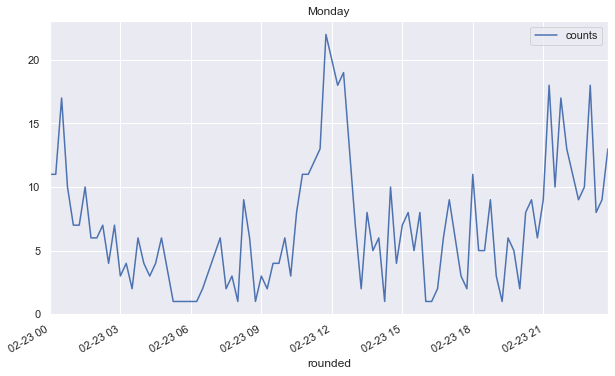

In [517]:
count_df['1970-02-23'].plot(figsize=(10, 6))
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

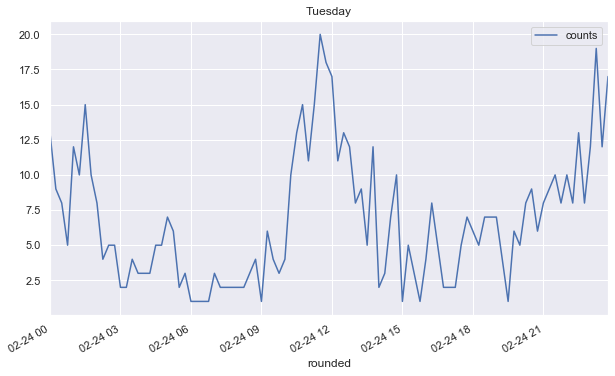

In [518]:
count_df['1970-02-24'].plot(figsize=(10, 6))
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

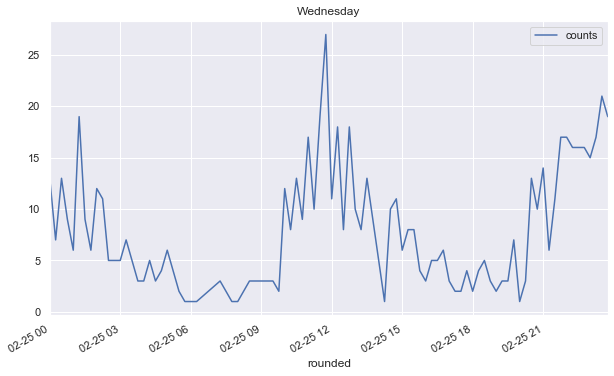

In [519]:
count_df['1970-02-25'].plot(figsize=(10, 6))
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

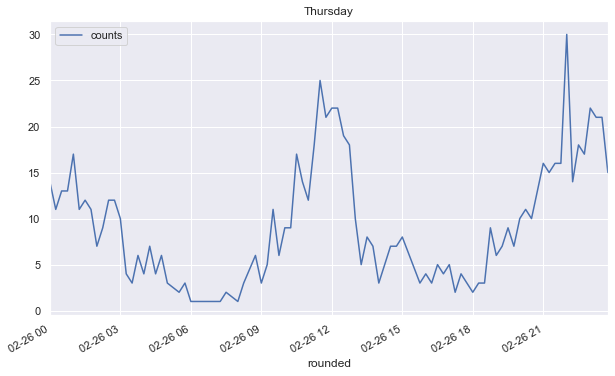

In [520]:
count_df['1970-02-26'].plot(figsize=(10, 6))
plt.title('Thursday')

Text(0.5, 1.0, 'Friday')

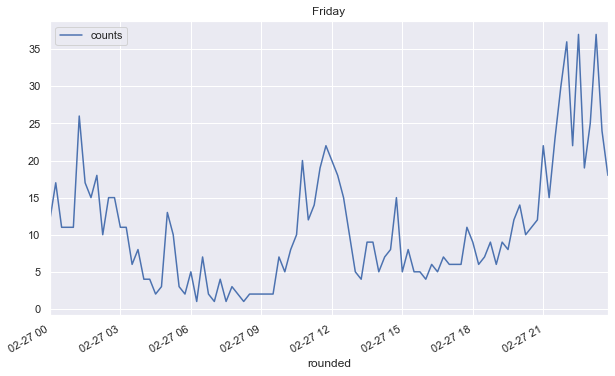

In [521]:
count_df['1970-02-27'].plot(figsize=(10, 6))
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

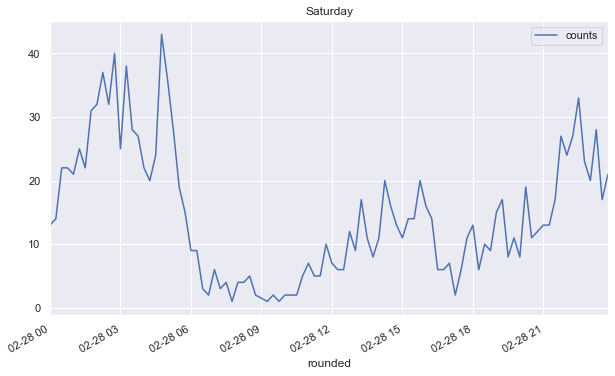

In [522]:
count_df['1970-02-28'].plot(figsize=(10, 6))
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

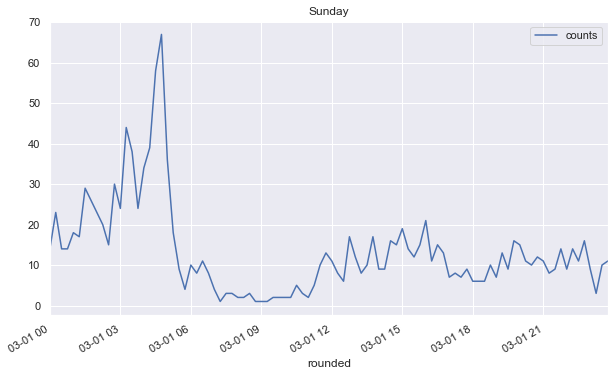

In [523]:
count_df['1970-03-01'].plot(figsize=(10, 6))
plt.title('Sunday')

# Plotting second week of April

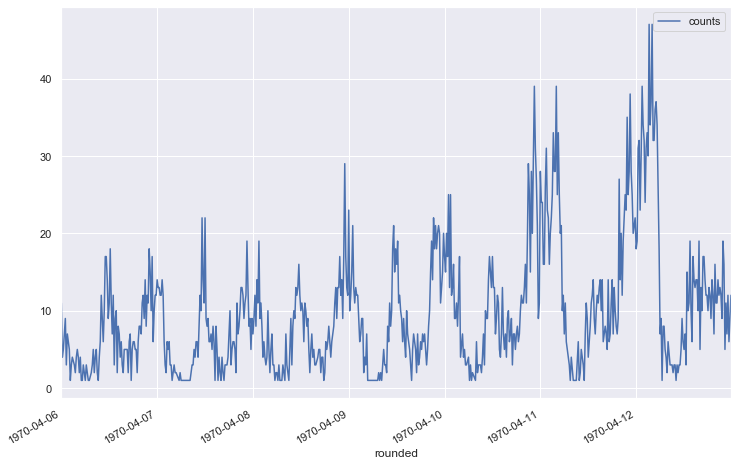

In [524]:
#plotting the first week of data, pandas days of week: 0 mon, 1 tues, 2 weds, 3 thurs, 4 fri, 5 sat, 6 sun
count_df['1970-04-06':'1970-04-12'].plot(figsize=(12, 8))

Text(0.5, 1.0, 'Monday')

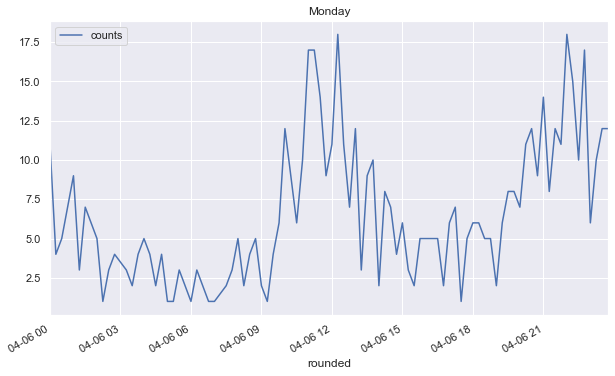

In [525]:
count_df['1970-04-06'].plot(figsize=(10, 6))
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

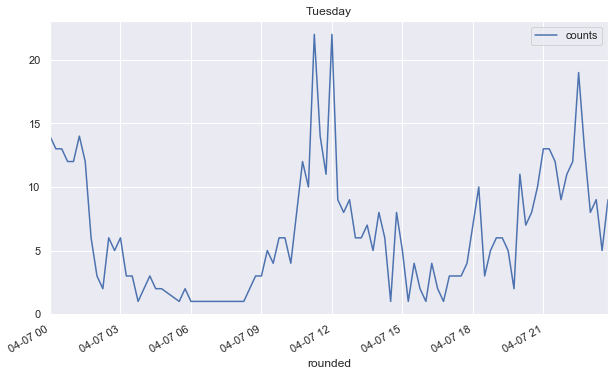

In [526]:
count_df['1970-04-07'].plot(figsize=(10, 6))
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

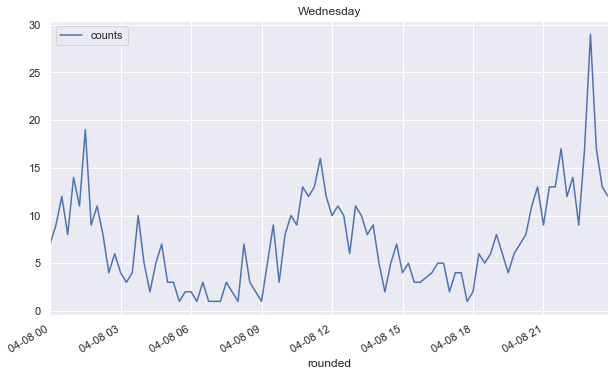

In [527]:
count_df['1970-04-08'].plot(figsize=(10, 6))
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

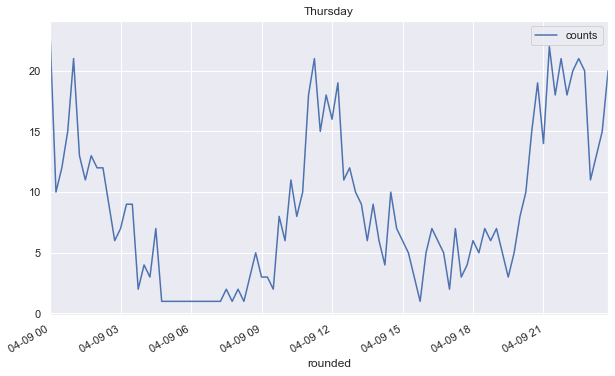

In [528]:
count_df['1970-04-09'].plot(figsize=(10, 6))
plt.title('Thursday')

Text(0.5, 1.0, 'Friday')

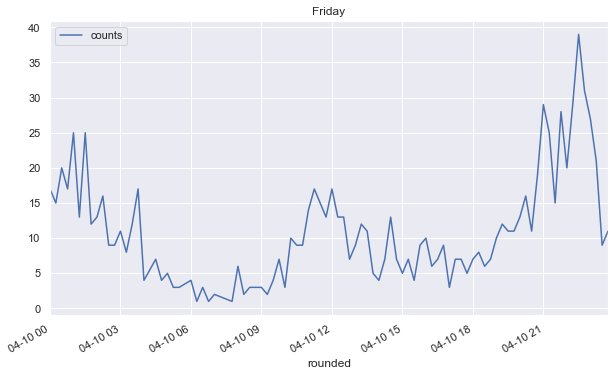

In [529]:
count_df['1970-04-10'].plot(figsize=(10, 6))
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

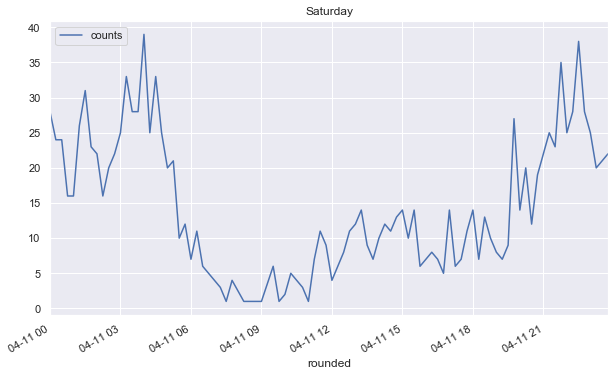

In [530]:
count_df['1970-04-11'].plot(figsize=(10, 6))
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

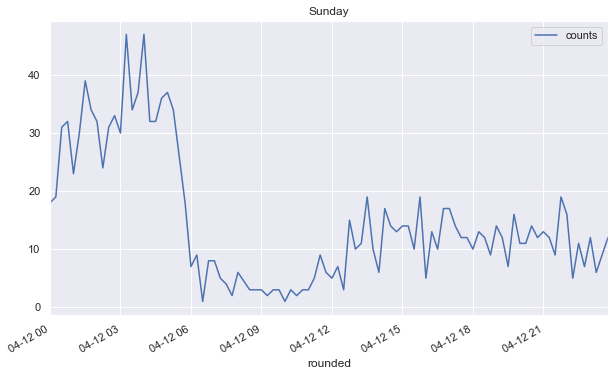

In [531]:
count_df['1970-04-12'].plot(figsize=(10, 6))
plt.title('Sunday')

# Describing Observed Trends

* Sundays - These days seem to have the most obvious pattern. Assuming we are talking about a ride sharing platform by the later questions in this project, it seems Sundays have very high deman in the early morning(presumably people coming home from a late night out on Saturday) and relatively low demand for the rest of the day.

* Weekdays (Mon, Tues, Wed, Thurs) - I have grouped each of these days together as they seem to follow a similar pattern. These days are characterized by large spikes in the range of 9 AM - 2 PM(usually focused around lunch) and occasional evening spikes. The specific days I plotted also seemed to have occasional higher early morning demand(before 6 AM), but it doesn't seem to be consistent.

* Fridays - Seem to maintain the weekday noon spike, but typically have much higher evening spikes. 

* Saturdays - Have high early morning spikes, and high evening spikes, but do not seem to have the lunch spikes like weekdays have. 

# Part 2 ‑Experiment and metrics design  
The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  
1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric? 
2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   
a. how     you    will     implement     the    experiment  
b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  
c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 


# Question 1

I'm going to begin my answer with a few assumptions, since this question is fairly open ended:

* We have a way to measure customer demand and wait time for rides in each city
* We have a way to measure driver location 

I am fairly certain that these are not unreasonable assumptions, so, onto my answer:
The primary metric I think would be usful for measuring the effectiveness of this kind of experiment would be customer wait time, specifically during high demand periods. Reducing wait time should be an important factor to a ride sharing company in the first place and I think lowered rider wait time(assuming raw numbers of drivers in a city aren't increasing, which could reduce wait timeidependant of this experiment).  I think this metric is the most important to focus on, while we could invent other metrics(such as measuring numbers of rides in each city a driver makes over time) I think rider wait time is the most customer focused metric to use, along with say, observing number of toll compensation requests recieved, to measure the success of this kind of policy.


# Question 2 
a. 
Experiment description: I would identify the top X% of drivers in each city, drivers who are the most active during the highest traffic times, and perhaps drivers in each city during their low activity times, and inform them of the complementary circadian rhythm that the city has, and offer these drivers compensation for recorded toll prices if they drove during the highest traffic times in the respective cities, and travel the tolls when appropriate(giving the drivers a window of time they could cross the bridge and be compensated). X would be determined with actual data, it would depend on the actual number of drivers in the cities and drivers who fit the description above(it may be too narrow a description if the number of drivers is too low). The number of drivers would need to be large enough that it would be likely that the changes would give a large enough effect size if a relatioship between drivers crossing the bridge and reducing wait times is discovered. The control data for this experiment would be the (hopefully) ample data that exists from before implementing this experimental group.

b.
After some amount of time that seems acceptable(at least three months most likely, perhaps longer) we could compare customer wait time during high demand periods and if it is correlated with the number of drivers crossing the bridge during the time periods that were outlined to complement the rhythm. I think the easiest thing to do would be to perform a two-sample T-test for a difference of means of wait time, assuming those means of wait time are different. We could also visualize the relationship between number of toll conpensation requests revieved and wait time, since we are looking for a relationship between the drivers moving to another city and reduced customer wait time.

c. 
The steps I would take to act on the results of this experiment would be as follows:
1. Determine if customer wait time was reduced significantly enough in this time period as a result of these actions to justify the cost of compensating riders for their toll use. If so, it would be prudent to recommend implementing the program to a larger number of drivers.
2. Assuming this helped reduce customer wait time: Determine a time period and criteria for allowing drivers access to this toll compensation program, and implement the program on a wider scale.
3. Continue to monitor rider wait time during high demand periods and its relationship to driver toll use, and modify the system as necesarry to keep the system working as intended.

An example of a modification of an implementation would be to expand the time window drivers could cross the toll road if it seems not enough riders are able to get across in time to meet demand.

# Part 3 - Predictive modeling

This section involved predicting retention based on data provied with the project. I won't put the full problem description here as it is a bit too long.

# Importing the new data and EDA

The next few code cells will involve me importing the data and exploring the data to find errors or missing values, and get a gist of what information may be gleaned purely from looking at the data.

It turns out that pandas cannot read this JSON, I think because it has NAN values, so I have to import the data a different way.

In [532]:
import json

In [533]:
file=open('ultimate_data_challenge.json', 'r')

file_content=file.read()

file.close()

data=json.loads(file_content)

df=pd.DataFrame(data)

In [534]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [535]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


To start with, I'd like to explore the variables wiht missing data, and see how I owuld like to address it. I would obviously start by asking why these values are missing, but since I have no one to ask, I will check the values and see how I would like to address it.

In [537]:
df.groupby('phone').size()

phone
Android    15022
iPhone     34582
dtype: int64

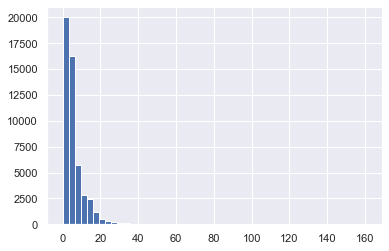

In [538]:
df.avg_dist.hist(bins=50)

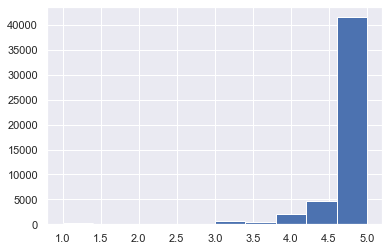

In [539]:
df.avg_rating_by_driver.hist()

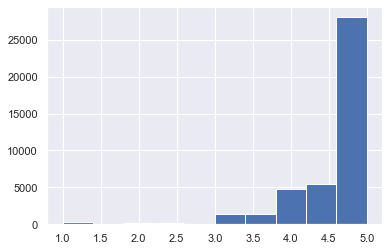

In [540]:
df.avg_rating_of_driver.hist()

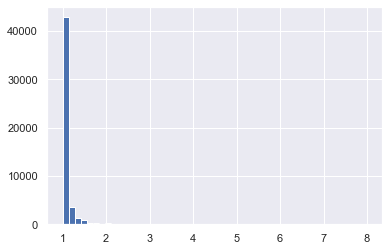

In [541]:
df.avg_surge.hist(bins=50)

After considering the missing values and exploring some of the numerical values, I've come to the follwoing conclusions:
1. The missing phone values could be dropped, as I'm not sure what to replace thos values with, and those values are less than 1% of the data.
2. The missing rating values will be replaced by the mean values with and imputer, since the combined missing values would be a bit more of the data, and replacing the ratings with the mean values seems reasonable.

In [542]:
#drop the missing phone values
new_df = df[df.phone.notnull()]

In [543]:
# check the new null counts
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


Now to impute the mean of our new values.

In [544]:
from sklearn.impute import SimpleImputer

In [545]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [546]:
new_ratings = imp.fit_transform(np.array(new_df.avg_rating_of_driver).reshape(-1,1))

In [547]:
new_df['avg_rating_of_driver'] = new_ratings

D:\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [548]:
new_df['avg_rating_by_driver'] = imp.fit_transform(np.array(new_df.avg_rating_by_driver).reshape(-1,1))

D:\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now that we aren't missing any values, we can do some more data exploration, particularly the city counts, and creating a retained target variable as we do not have that yet.

In [549]:
new_df.groupby('city').size()

city
Astapor           16413
King's Landing    10066
Winterfell        23125
dtype: int64

In [550]:
new_df['last_trip_date'] = pd.to_datetime(new_df['last_trip_date'])
new_df['signup_date'] = pd.to_datetime(new_df['signup_date'])

D:\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [551]:
from datetime import datetime

I do not exactly understand how the prompt defines retained, since it mentions the preceding 30 days, and users active in their six month, so what I am assuming, is that a user is retained if they used the service in greater than their fifth month of use, since this data was pulled only looking at January signups, we want users who are active more than five months after they have signed up. running on that assumption, let us observe what we have:

In [552]:
# calculate the month difference between the 
month_diff = ((new_df['last_trip_date'] - new_df['signup_date']) / np.timedelta64(1, 'M'))

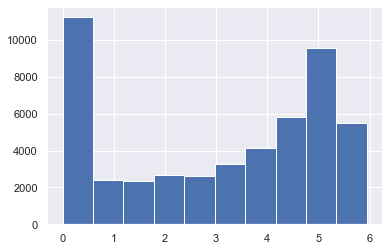

In [553]:
month_diff.hist()

In [554]:
retained = []

In [555]:
for diff in month_diff:
    if diff > 5:
        retained.append(True)
    else:
        retained.append(False)

In [556]:
new_df['retained'] = retained

D:\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [557]:
new_df.groupby('retained').size()

retained
False    38487
True     11117
dtype: int64

In [558]:
11117 / (11117 + 38487)

0.2241149907265543

It seems 22.4% of users were retained from signups in January(from the data that we have after already droppinf the missing phone data). Now that we have our target variable, I will clean up the data frame, remove some unnecesarry features(specifically the singup and last trip date, as those columns don't contain useful information for this problem that we do not already have), and try to build a model to predict retention.

In [559]:
# turn the boolean columns into int columns for modeling
new_df['ultimate_black_user'] = new_df['ultimate_black_user'].astype(int)
new_df['retained'] = new_df['retained'].astype(int)

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [560]:
num_dat = new_df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days','weekday_pct']]

In [561]:
cat_dat = new_df[['city', 'phone']]
cat_df = pd.get_dummies(cat_dat)

In [562]:
# now the model data with one hot encoded variables is finished
mod_dat = pd.concat([num_dat,cat_df], axis = 1)

I will be using logistic regression for this task, since it seems to fit rather well for this problem.

In [563]:
# importing packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [564]:
mod_dat = mod_dat.reset_index()

In [565]:
mod_dat = mod_dat.round(8)

In [566]:
X = mod_dat
y = new_df['retained']

In [567]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [568]:
logreg = LogisticRegression()

In [569]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [570]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11449,   128],
       [ 3138,   167]], dtype=int64)

In [571]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7805402499664024
Precision: 0.5661016949152542
Recall: 0.05052950075642965


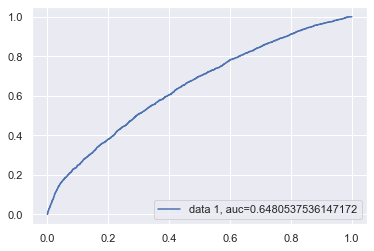

In [572]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This AUC is not very good, so I will try to improve the model, with resampling.

In [573]:
import imblearn

In [574]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_x= pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [575]:
logreg2 = LogisticRegression()

In [576]:
logreg2.fit(os_data_x,os_data_y)
y_pred=logreg2.predict(X_test)

D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Ana\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [577]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[7868, 3709],
       [1307, 1998]], dtype=int64)

In [578]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.662948528423599
Precision: 0.3500963728754162
Recall: 0.6045385779122542


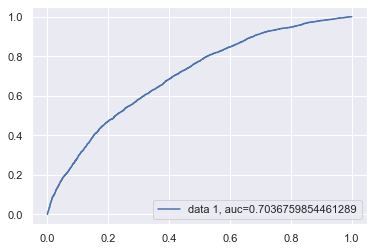

In [579]:
y_pred_proba = logreg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

With SMOTE we were able to get to an AUC of 0.70, which is better than the last model, but still is not great. Let us try to do some feature selection to improve the model.

In [581]:
from sklearn.feature_selection import RFE

In [652]:
logreg = LogisticRegression()
rfe = RFE(logreg, 9)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True  True  True  True False  True False  True  True False  True
  True]
[5 1 1 1 1 4 1 3 1 1 2 1 1]


D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [653]:
new_train = os_data_X[:,rfe.support_]

In [654]:
logreg2.fit(new_train,os_data_y)
y_pred=logreg2.predict(X_test.loc[:,rfe.support_])

D:\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Ana\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [655]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[7856, 3721],
       [1313, 1992]], dtype=int64)

In [656]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6617390135734444
Precision: 0.34867845265184666
Recall: 0.6027231467473525


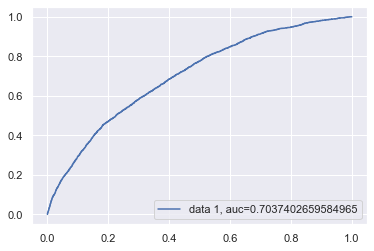

In [657]:
y_pred_proba = logreg2.predict_proba(X_test.loc[:,rfe.support_])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [661]:
import statsmodels.api as sm

In [672]:
X = X_train[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'trips_in_first_30_days','city_Astapor',"city_King's Landing",'phone_Android','phone_iPhone']]

In [673]:
y = y_train

In [674]:
logit_model=sm.Logit(np.asarray(y),np.asarray(X))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.483058
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.094     
Dependent Variable: y                AIC:              33563.4646
Date:               2019-12-08 13:36 BIC:              33639.5607
No. Observations:   34722            Log-Likelihood:   -16773.   
Df Model:           8                LL-Null:          -18512.   
Df Residuals:       34713            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.0391     0.0030   -13.0650   0.0000   -0.0449   -0.0332
x2       -0.1135     0.0305    -3.7190   0.0002   -0.1733 

In [658]:
X_test.loc[:,rfe.support_]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,city_Astapor,city_King's Landing,phone_Android,phone_iPhone
10722,3.86,4.8,5.000000,1.75,2,0,0,0,1
32762,2.69,4.4,4.700000,1.00,3,0,0,0,1
20311,2.07,5.0,5.000000,1.25,2,0,1,0,1
24682,5.74,5.0,4.601467,1.00,1,0,0,1,0
40534,1.66,4.7,3.500000,1.03,2,0,0,0,1
40409,7.84,5.0,4.000000,2.00,1,0,0,1,0
45045,16.11,5.0,4.400000,1.00,0,0,0,1,0
22322,4.14,5.0,5.000000,1.00,2,1,0,0,1
3941,2.77,5.0,4.601467,1.00,1,1,0,0,1
31520,3.60,5.0,1.000000,1.06,1,1,0,0,1


Observing the restults of this model, here are the conclusions I have drawn:
1. It seems a logistic regression may not be the best answer to this problem. After extensive feature selection and resampling the best auc obtained was still 0.7, and that is not the best restult.
2. It seems that ratings do not actually matter, or at least are insiginificant in the model when it come to retention, so it may be prudent to assess what information ratings can actually provide is they are not significant for predicting retention.
3. It seems city is an important feature for retention, as since two out of the three cities are here, we may want to look into what factors these cities have that affect our business in terms of retention.
4. Number of trips in the first thirty days seems to be a significant factor in retention, so we may desire to look into a program that may incentivise more use of the service in the first thirty days to promote a more common use of the service early, as that may increase retention.